<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 13** | Regressão II
Caderno de **exercício 01**<br>

# Regressão múltipla

Discente: Samuel Saturno


#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

Importando as bibliotecas

In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn.ensemble import RandomForestClassifier

# from scipy.stats import ks_2samp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

%matplotlib inline

In [12]:
df = pd.read_csv('previsao_de_renda.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

Limpeza do banco de dados " previsao_de_renda.csv"

In [14]:
# Usando a função drop para deletar as colunas irrelevante do dataframe
df = df.dropna()
df.drop(columns=['Unnamed: 0','data_ref','id_cliente'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12427 non-null  object 
 1   posse_de_veiculo       12427 non-null  bool   
 2   posse_de_imovel        12427 non-null  bool   
 3   qtd_filhos             12427 non-null  int64  
 4   tipo_renda             12427 non-null  object 
 5   educacao               12427 non-null  object 
 6   estado_civil           12427 non-null  object 
 7   tipo_residencia        12427 non-null  object 
 8   idade                  12427 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  12427 non-null  float64
 11  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.1+ MB


<ipython-input-14-a549aec8e618>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 0','data_ref','id_cliente'], inplace=True)


1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.  


2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.  


3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor.
    

In [15]:
# Viswualizando o dataframe
df.head(2)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15


In [6]:
# 1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.

# Ajustando um modelo de regressão linear múltipla com o logaritmo da 'renda' como variável dependente e algumas variáveis independentes
reg = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + C(qtd_filhos) + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data = df).fit()

# Exibindo um resumo dos resultados da regressão
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     230.6
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:46:33   Log-Likelihood:                -13561.
No. Observations:               12427   AIC:                         2.718e+04
Df Residuals:                   12396   BIC:                         2.741e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.5605      0.235     27.889      0.000       6.099       7.022
sexo[T.M]                            0.7882      0.015     53.731      0.000       0.759       0.817
posse_de_veiculo[T.True]             0.0433      0.014      3.063      0.002       0.016       0.071
posse_de_imovel[T.True]              0.0830      0.014      5.927      0.000       0.056       0.110
C(qtd_filhos)[T.1]                  -0.2530      0.109     -2.326      0.020      -0.466      -0.040
C(qtd_filhos)[T.2]                  -0.5138      0.216     -2.378      0.017      -0.937      -0.090
C(qtd_filhos)[T.3]                  -0.9242      0.328     -2.820      0.005      -1.567      -0.282
C(qtd_filhos)[T.4]                  -0.8178      0.465     -1.758      0.079      -1.730       0.094
C(qtd_filhos)[T.5]                  -1.0294      0.743     -1.385      0.166      -2.487       0.428
C(qtd_filhos)[T.7]                  -2.0322      0.820     -2.477      0.013      -3.640      -0.424
C(qtd_filhos)[T.14]                 -4.7943      1.592     -3.011      0.003      -7.916      -1.673
tipo_renda[T.Bolsista]               0.2242      0.241      0.930      0.353      -0.248       0.697
tipo_renda[T.Empresário]             0.1551      0.015     10.389      0.000       0.126       0.184
tipo_renda[T.Pensionista]           -0.3119      0.241     -1.293      0.196      -0.785       0.161
tipo_renda[T.Servidor público]       0.0556      0.022      2.501      0.012       0.012       0.099
educacao[T.Pós graduação]            0.0995      0.159      0.625      0.532      -0.212       0.411
educacao[T.Secundário]              -0.0139      0.072     -0.192      0.847      -0.155       0.127
educacao[T.Superior completo]        0.0932      0.072      1.290      0.197      -0.048       0.235
educacao[T.Superior incompleto]     -0.0423      0.078     -0.544      0.587      -0.195       0.110
estado_civil[T.Separado]             0.3311      0.111      2.976      0.003       0.113       0.549
estado_civil[T.Solteiro]             0.2739      0.109      2.515      0.012       0.060       0.487
estado_civil[T.União]               -0.0340      0.025     -1.351      0.177      -0.083       0.015
estado_civil[T.Viúvo]                0.3735      0.116      3.231      0.001       0.147       0.600
tipo_residencia[T.Casa]             -0.0435      0.054     -0.804      0.421      -0.150       0.063
tipo_residencia[T.Com os pais]      -0.0245      0.060     -0.406      0.685      -0.143       0.094
tipo_residencia[T.Comunitário]      -0.1204      0.106     -1.139      0.255      -0.328       0.087
tipo_residencia[T.Estúdio]           0.0632      0.099      0.636      0.525      -0.132       0.258
tipo_residencia[T.Governamental]    -0.0556      0.06

Gráfico de Resíduos vs. Valores Ajustados

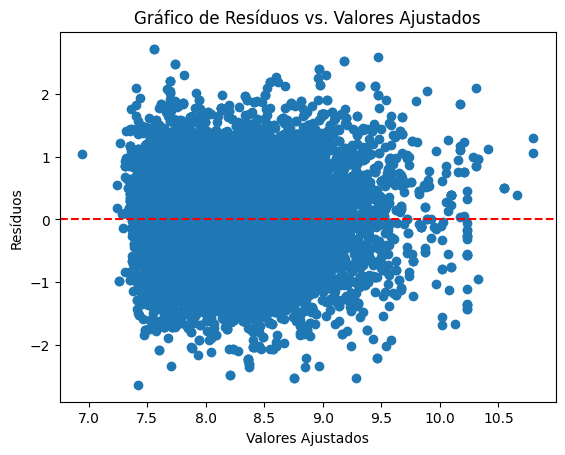

In [20]:
# Calculando os resíduos
residuos = reg.resid

# Calculando os valores ajustados
valores_ajustados = reg.fittedvalues

# Plotando o gráfico de resíduos vs. valores ajustados
plt.scatter(valores_ajustados, residuos)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Ajustados')
plt.axhline(y=0, color='r', linestyle='--')  # Adicionando linha horizontal em y=0
plt.show()


Histograma dos Resíduos

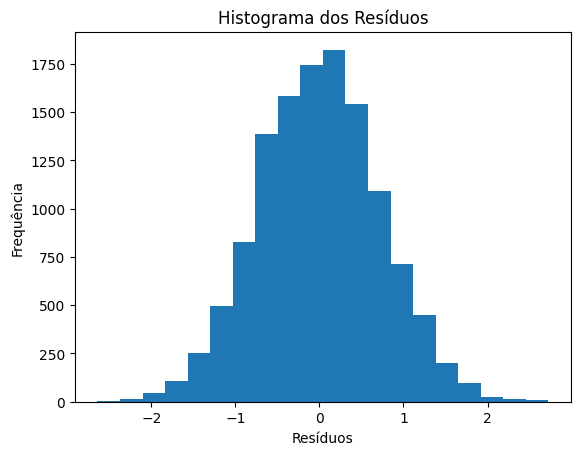

In [21]:
# Plotando o histograma dos resíduos
plt.hist(residuos, bins=20)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()


Gráfico dQ-Q (Quantil-Quantil) dos Resíduos

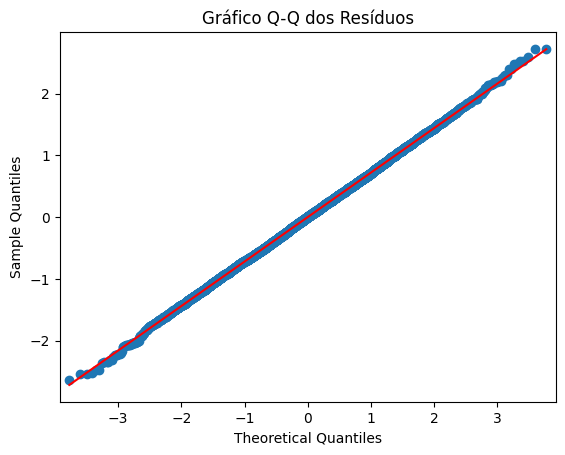

In [22]:
# Plotando o gráfico Q-Q dos resíduos
sm.qqplot(residuos, line='s')
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()


## Insight 01:

Para identificar as variáveis menos significativas, levamos em consideração os valores de P>|t| na coluna do resumo da regressão. Valores de P>|t| maiores que "0,005" indicam menor significância estatística da variável.

Neste resumo de regressão, as variáveis com os maiores valores de P>|t| são aquelas cujos coeficientes têm o menor impacto no modelo:

* tipo_renda[T.Bolsista]: 0.353
* educacao[T.Pós graduação]: 0.532
* educacao[T.Secundário]: 0.847
* educacao[T.Superior completo]: 0.197
* educacao[T.Superior incompleto]: 0.587
* tipo_residencia[T.Casa]: 0.421
* tipo_residencia[T.Com os pais]: 0.685
* tipo_residencia[T.Comunitário]: 0.255
* tipo_residencia[T.Estúdio]: 0.525
* tipo_residencia[T.Governamental]: 0.399
* estado_civil[T.União]: 0.177

In [19]:
# 2. Remova a variável menos significante e analise

# 3. Siga removendo as variáveis menos significantes, sempre que o p-value for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor.

# Ajustando um modelo de regressão linear múltipla com o logaritmo da 'renda' como variável dependente e algumas variáveis independentes
reg_rem = smf.ols('np.log(renda) ~ sexo + posse_de_imovel + idade + tempo_emprego', data = df).fit()

# Exibindo um resumo dos resultados da regressão
reg_rem.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1637.
Date:                Wed, 06 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:46:22   Log-Likelihood:                -13685.
No. Observations:               12427   AIC:                         2.738e+04
Df Residuals:                   12422   BIC:                         2.742e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.2790      0.031    233.591      0.000       7.218       7.340
sexo[T.M]                   0.7895      0.014     57.276      0.000       0.762       0.817
posse_de_imovel[T.True]     0.0898      0.014      6.512      0.000       0.063       0.117
idade                       0.0042      0.001      5.635      0.000       0.003       0.006
tempo_emprego               0.0610      0.001     59.110      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.194   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.174
Skew:                           0.023   Prob(JB):                        0.556
Kurtosis:                       3.012   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Gráfico de Resíduos vs. Valores Ajustados com as variáveis mais significativas.


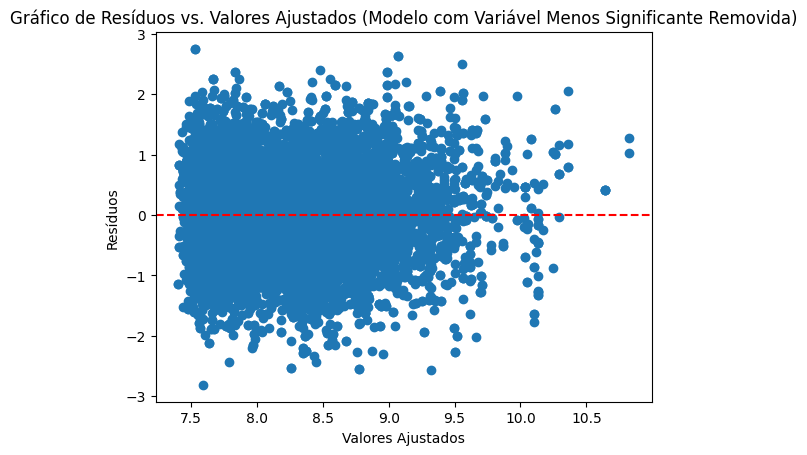

In [23]:
# Calculando os resíduos
residuos_rem = reg_rem.resid

# Calculando os valores ajustados
valores_ajustados_rem = reg_rem.fittedvalues

# Plotando o gráfico de resíduos vs. valores ajustados
plt.scatter(valores_ajustados_rem, residuos_rem)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Ajustados (Modelo com Variável Menos Significante Removida)')
plt.axhline(y=0, color='r', linestyle='--')  # Adicionando linha horizontal em y=0
plt.show()


Histograma dos Resíduos:

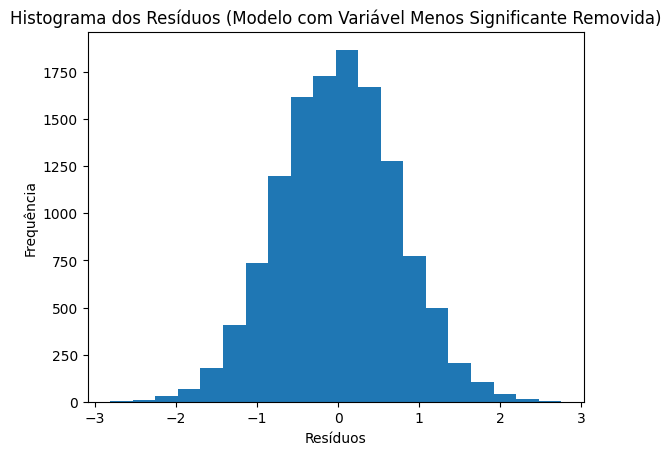

In [24]:
# Plotando o histograma dos resíduos
plt.hist(residuos_rem, bins=20)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos (Modelo com Variável Menos Significante Removida)')
plt.show()


Gráfico Q-Q (Quantil-Quantil) dos Resíduos:

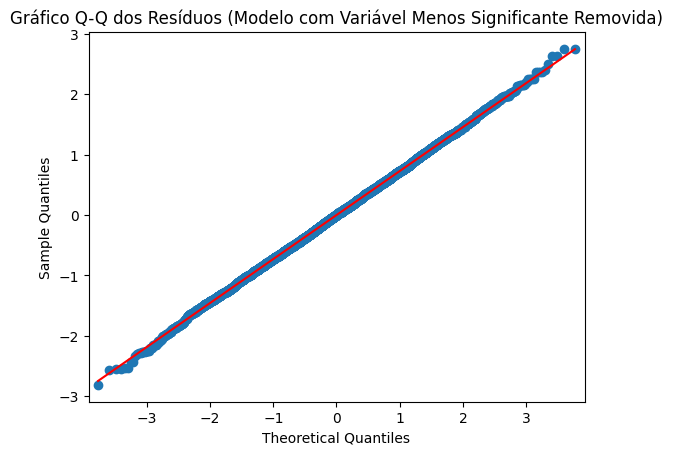

In [25]:
# Plotando o gráfico Q-Q dos resíduos
sm.qqplot(residuos_rem, line='s')
plt.title('Gráfico Q-Q dos Resíduos (Modelo com Variável Menos Significante Removida)')
plt.show()


## Insight 02:

Comparando os dois modelos de regressão linear múltipla para prever o logaritmo da renda:

### Modelo 1 (Após Remover a Variável Menos Significante):

* R-squared: 0.345
* Intercept: 7.2790
* Sexo (M): Coeficiente de 0.7895, indicando que ser do sexo masculino está associado a um aumento de 78.95% na renda.
* Posse de Imóvel (True): Coeficiente de 0.0898, sugerindo que possuir imóvel está associado a um aumento de 8.98% na renda.
* Idade: Coeficiente de 0.0042, indicando que um aumento de 1 unidade na idade está associado a um aumento de 0.42% na renda.
* Tempo de Emprego: Coeficiente de 0.0610, sugerindo que um aumento de 1 unidade no tempo de emprego está associado a um aumento de 6.10% na renda.


### Modelo 2 (Com Todas as Covariáveis Disponíveis):

* R-squared: 0.358
* Intercept: 6.5605
* Sexo (M): Coeficiente de 0.7882, indicando que ser do sexo masculino está associado a um aumento de 78.82% na renda.
* Posse de Imóvel (True): Coeficiente de 0.0830, sugerindo que possuir imóvel está associado a um aumento de 8.30% na renda.
* Idade: Coeficiente de 0.0056, indicando que um aumento de 1 unidade na idade está associado a um aumento de 0.56% na renda.
* Tempo de Emprego: Coeficiente de 0.0616, sugerindo que um aumento de 1 unidade no tempo de emprego está associado a um aumento de 6.16% na renda.


Ambos os modelos têm um desempenho razoável na explicação da variação na renda, com R-squared em torno de 0.35. O modelo simplificado (Modelo 1) após remover a variável menos significante ainda mantém a maioria dos fatores significativos, incluindo sexo, posse de imóvel, idade e tempo de emprego, com coeficientes de magnitude semelhante aos do modelo completo (Modelo 2). Isso sugere que, embora a simplificação do modelo tenha sido realizada, a capacidade de previsão não foi significativamente comprometida.